# 데이터 분석 코드 필사 (2020.07.22)

## - 원본: [Titanic Data Science Solutions (by Manav Sehgal)](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

## - 순서

### [1. 문제 정의](#문제-정의)
### [2. 훈련, 테스트 자료 정의](#훈련,-테스트-자료-정의)
### [3. 데이터 분석](#데이터-분석)
### [4. 데이터 전처리](#데이터-전처리)
### [5. 모델링을 통한 예측](#모델링을-통한-예측)
### [6. 문제 해결](#문제-해결)
### [7. 제출](#제출)

# 문제 정의

- 1912년 4월 15일 타이타닉 호가 북대서양 해상에서 유빙과 충돌해 가라앉는 사고가 발생
- 전체 2224 명의 승객들 중 1502 명의 사망자를 기록 (32% 생존율)
- 높은 사망율은 부족한 구명선 때문
- 특정 그룹(예: 어린이, 상류층)의 생존율이 비교적 높았음


- 문제: 타이타닉 승객 정보를 이용해 타이타닉 사고로 인한 생존/사망 여부를 예측하는 것이 목적
- 훈련 자료: 타이타닉에 승선한 승객 정보와 사고로 인한 생존/사망 여부의 정보
- 테스트 자료: 오직 승객 정보만

# 훈련, 테스트 자료 정의

In [3]:
"""훈련, 테스트 자료 불러오기"""
import pandas as pd

train_df = pd.read_csv("./DATA/train.csv")
test_df  = pd.read_csv("./DATA/test.csv")

In [4]:
"""사용 가능한 변수 확인"""
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
"""훈련 자료 정보"""
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 범주형
  * 명목형: 생존 여부(Survived), 성별(Sex), 객실(Cabin), 승선지(Embarked)
  * 순서형: 티켓 클래스(Pclass)

* 수치형
  * 이산형: 연령(Age), 함께 승선한 형제자매와 배우자의 수(SibSp), 함께 승선한 부모와 자식의 수(Parch)
  * 연속형: 요금(Fare)



* 훈련 자료의 Null 개수: Cabin > Age > Embarked

In [8]:
"""테스트 자료 정보"""
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* 테스트 자료의 Null 개수: Cabin > Age > Fare

In [13]:
"""훈련 자료 확인"""
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 데이터 분석

In [10]:
"""훈련 자료 int, float 변수 통계치"""
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 훈련 자료 샘플 수: 891 (count = 891)
* 훈련 자료 샘플 내 생존율: 38.4% (mean of Survived = 0.384)

In [15]:
"""훈련 자료 object 변수 통계치"""
train_df.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Markoff, Mr. Marin",male,1601,B96 B98,S
freq,1,577,7,4,644


* 훈련 자료 남성 수: 577 명(top = male, freq = 577)
* 훈련 자료 가장 많은 승선지: S, 644 명(top = S, freq = 644)

In [23]:
"""
훈련 자료에서 티켓 클래스에 따른 생존율 비교
groupby에 as_index를 False로 하면 Pclass를 index로 사용하지 않음
"""
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


* 티켓 클래스가 좋을수록 생존율이 높음

In [22]:
"""as_index를 True로 하면 Pclass를 index로 사용함"""
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).mean().sort_values(by = "Survived", ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [25]:
"""훈련 자료에서 성별에 따른 생존율 비교"""
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


* 여성의 생존율이 남성보다 높음

In [27]:
"""훈련 자료에서 함께 승선한 형제자매와 배우자 수에 따른 생존율 비교"""
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [28]:
"""훈련 자료에서 함께 승선한 부모와 자식 수에 따른 생존율 비교"""
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


* 동행이 적은 경우 생존율이 높음

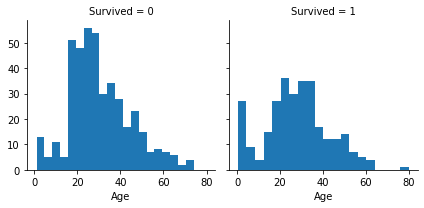

In [32]:
"""훈련 자료에서 생존 여부에 따른 연령 분포"""
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(train_df, col = "Survived") # 열(col)을 생존 여부로 나눔
g.map(plt.hist, "Age", bins = 20b) # 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정

* 4세 이하의 유아의 생존율이 높음
* 15~25세 승객들의 생존율이 낮음

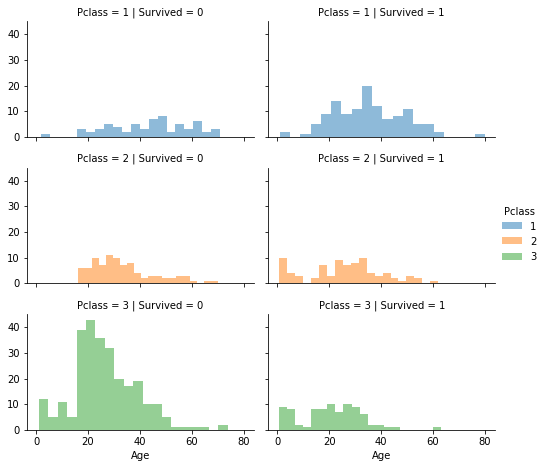

In [34]:
"훈련 자료에서 티켓 등급과 생존 여부에 따른 연령 분포"
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", hue = "Pclass", height = 2.2, aspect = 1.6)
# 열을 생존 여부, 행(row)과 색깔(hue)을 티켓 클래스로 나눔, width = height * aspect
g.map(plt.hist, "Age", alpha = 0.5, bins = 20) # 투명도(alpha): 0.5
g.add_legend() # 범례 추가

* 티켓 등급이 3등급인 경우, 승객 수는 가장 많고, 생존율도 가장 낮음
* 티켓 등급이 2등급인 유아는 대부분 생존함
* 티켓 등급이 1등급인 경우 생존율이 비교적 높음

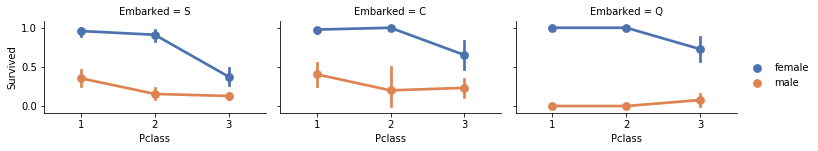

In [45]:
"""훈련 자료에서 승선지와 티켓 등급에 따른 생존율"""
g = sns.FacetGrid(train_df, col = "Embarked", height = 2.2, aspect = 1.6)
g.map(sns.pointplot, "Pclass", "Survived", "Sex", palette = "deep", order = [1, 2, 3], hue_order = ["female", "male"])
# Pointplot으로 시각화, x: 티켓 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [여성, 남성]
g.add_legend()

* Error bar는 1표준 편차
* 승선지가 C와 Q인 경우, 남성의 티켓 등급이 3등급일 때 2등급보다 생존율이 높을 가능성이 있음

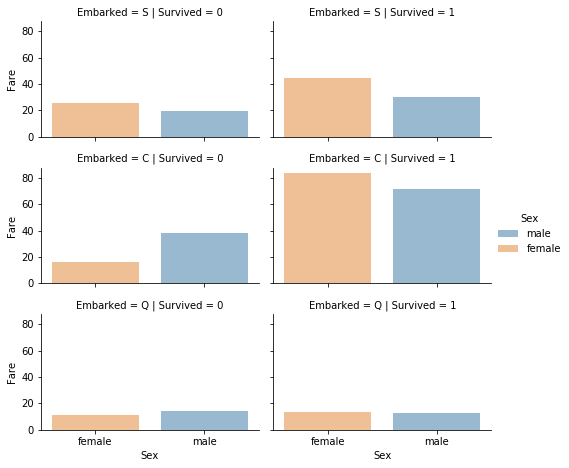

In [48]:
"""훈련 자료에서 승선지, 생존 여부, 성별에 따른 요금"""
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", hue = "Sex", height = 2.2, aspect = 1.6)
g.map(sns.barplot, "Sex", "Fare", alpha = 0.5, ci = None, order = ["female", "male"])
# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
g.add_legend()

* 승선지가 S 또는 C인 경우, 생존한 승객들의 평균 요금이 비교적 높음

# 데이터 전처리

In [49]:
"""안 쓸 변수(Ticket, Cabin) 제거"""
print("Before", train_df.shape, test_df.shape)

train_df = train_df.drop(["Ticket", "Cabin"], axis = 1) # 열(axis = 1) 제거
test_df  =  test_df.drop(["Ticket", "Cabin"], axis = 1)

print("After", train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [50]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [55]:
"""훈련 자료의 이름에서 칭호만 추출해서 Title 열에 저장"""
train_df["Title"] = train_df.Name.str.extract("([A-Za-z]+)\.", expand = False)
# 알파벳으로 되어있고 .으로 찍힌 패턴 추출, expand = False면 Series 리턴
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


* [pandas.Series.str.extract 사용법](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html)

In [56]:
"""빈도표 만들기"""
pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [57]:
"""드문 칭호를 바꾸기"""
train_df["Title"] = train_df["Title"].replace(["Capt", "Col", "Don", "Jonkheer", "Major", "Rev", "Sir"], "MaleRare")
train_df["Title"] = train_df["Title"].replace(["Countess", "Lady", "Mlle", "Mme", "Ms"], "FemaleRare")
train_df["Title"] = train_df["Title"].replace(["Dr"], "Rare")

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,MaleRare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [59]:
"""훈련 자료에서 칭호에 따른 생존율"""
train_df[["Title", "Survived"]].groupby(["Title"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Title,Survived
0,FemaleRare,1.000000
5,Mrs,0.792000
3,Miss,0.697802
2,Master,0.575000
6,Rare,0.428571
1,MaleRare,0.214286
4,Mr,0.156673


# 모델링을 통한 예측

# 문제 해결

# 제출